<a href="https://colab.research.google.com/github/slon101/dw_matrix_road_sign/blob/master/day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import os
import datetime
from tqdm import tqdm

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

%load_ext tensorboard

import matplotlib.pyplot as plt
from skimage import color, exposure

from sklearn.metrics import accuracy_score

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [0]:
cd '/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/dw_matrix_road_sign'

/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/dw_matrix_road_sign


In [0]:
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [0]:
y_train

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [0]:
len(np.unique(y_train))

43

In [0]:

to_categorical(y_train)[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [0]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=uint8)

In [0]:
to_categorical(y_train)[-1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
if y_train.ndim == 1: y_train = to_categorical(y_train)
if y_test.ndim == 1: y_test = to_categorical(y_test)

In [0]:
y_train.shape

(34799, 43)

In [0]:

X_train.shape

(34799, 32, 32, 3)

In [0]:

input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [0]:
 model = Sequential([
  Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape), 
  
  Flatten(),

  Dense(num_classes, activation='softmax')
])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0         
_________________________________________________________________
dense (Dense)                (None, 43)                2476843   
Total params: 2,478,635
Trainable params: 2,478,635
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [0]:

model.fit(X_train, y_train)

1088/1088 [==============================] - 47s 43ms/step - loss: 3.4824 - accuracy: 0.8011


In [0]:
def get_cnn_v1(input_shape, num_classes):
  return Sequential([
  Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape), 
  
  Flatten(),

  Dense(num_classes, activation='softmax')
  ])

def train_model(model, X_train, y_train, params_fit={}):
  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
  
  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
  
  model.fit(
      X_train, 
      y_train,
      batch_size=params_fit.get('batch_size', 128),
      epochs=params_fit.get('epochs', 5),
      verbose=params_fit.get('verbose', 1),
      validation_data=params_fit.get('validation_data', (X_train, y_train)),
      callbacks= [tensorboard_callback]
  )
  return model

In [0]:
model = get_cnn_v1(input_shape, num_classes)
model_trained = train_model(model, X_train, y_train)

Epoch 1/5
272/272 [==============================] - 47s 172ms/step - loss: 49.1812 - accuracy: 0.7153 - val_loss: 0.2956 - val_accuracy: 0.9308
Epoch 2/5
272/272 [==============================] - 46s 170ms/step - loss: 0.2220 - accuracy: 0.9503 - val_loss: 0.1087 - val_accuracy: 0.9738
Epoch 3/5
272/272 [==============================] - 46s 168ms/step - loss: 0.1313 - accuracy: 0.9706 - val_loss: 0.1085 - val_accuracy: 0.9725
Epoch 4/5
272/272 [==============================] - 46s 168ms/step - loss: 0.0973 - accuracy: 0.9773 - val_loss: 0.0674 - val_accuracy: 0.9843
Epoch 5/5
272/272 [==============================] - 46s 169ms/step - loss: 0.1432 - accuracy: 0.9687 - val_loss: 0.2037 - val_accuracy: 0.9552


In [0]:
y_pred_prob = model_trained.predict(X_test)
y_pred_prob

array([[7.2371904e-14, 3.5467638e-06, 1.6160877e-02, ..., 2.4800283e-05,
        4.8990850e-03, 4.9811723e-07],
       [2.6932417e-12, 2.1260789e-06, 1.4660694e-01, ..., 2.6928788e-05,
        4.1817352e-06, 5.5726403e-08],
       [4.4250428e-15, 9.5274714e-07, 3.2819379e-03, ..., 3.9677434e-06,
        2.3953489e-03, 1.4883942e-07],
       ...,
       [6.3111102e-03, 7.6471241e-03, 6.7205355e-03, ..., 3.1898608e-03,
        1.2703981e-02, 7.5740730e-03],
       [2.1795605e-03, 2.2241553e-02, 1.2052621e-02, ..., 3.3583206e-03,
        9.8380093e-03, 8.1358681e-04],
       [8.8440761e-04, 1.0265385e-02, 1.8644389e-02, ..., 1.2102271e-03,
        9.2352694e-03, 2.4438729e-03]], dtype=float32)

In [0]:
y_pred_prob[400]

array([1.77236359e-07, 9.70919192e-01, 2.95365885e-11, 3.92890229e-13,
       2.90806256e-02, 9.01479737e-13, 1.26290561e-17, 3.10916287e-20,
       1.24273515e-14, 3.92528431e-13, 3.46823755e-16, 7.39048274e-15,
       9.95936045e-17, 4.77783394e-13, 6.09993124e-19, 3.67850294e-19,
       5.68160129e-18, 1.24225871e-18, 2.46936087e-12, 2.12857566e-16,
       5.73250061e-18, 8.95225847e-20, 8.05214798e-17, 3.65797672e-18,
       1.33622285e-15, 8.11569129e-20, 9.93156634e-14, 3.85855327e-27,
       4.37282188e-16, 2.23030382e-15, 1.82372439e-25, 1.28209260e-19,
       3.95641117e-24, 2.94615188e-23, 1.66236186e-28, 3.50500215e-22,
       1.57215343e-19, 2.41026145e-25, 7.93100323e-24, 1.48468245e-23,
       1.14474430e-20, 3.94035921e-22, 1.15946281e-35], dtype=float32)

In [0]:
np.sum( [1.77236359e-07, 9.70919192e-01, 2.95365885e-11, 3.92890229e-13,
       2.90806256e-02, 9.01479737e-13, 1.26290561e-17, 3.10916287e-20,
       1.24273515e-14, 3.92528431e-13, 3.46823755e-16, 7.39048274e-15,
       9.95936045e-17, 4.77783394e-13, 6.09993124e-19, 3.67850294e-19,
       5.68160129e-18, 1.24225871e-18, 2.46936087e-12, 2.12857566e-16,
       5.73250061e-18, 8.95225847e-20, 8.05214798e-17, 3.65797672e-18,
       1.33622285e-15, 8.11569129e-20, 9.93156634e-14, 3.85855327e-27,
       4.37282188e-16, 2.23030382e-15, 1.82372439e-25, 1.28209260e-19,
       3.95641117e-24, 2.94615188e-23, 1.66236186e-28, 3.50500215e-22,
       1.57215343e-19, 2.41026145e-25, 7.93100323e-24, 1.48468245e-23,
       1.14474430e-20, 3.94035921e-22, 1.15946281e-35] )

0.9999999948706536

<BarContainer object of 43 artists>

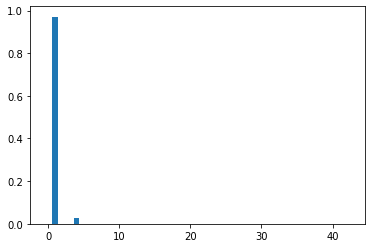

In [0]:
plt.bar(range(43), y_pred_prob[400])

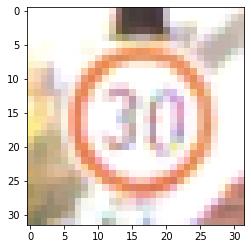

In [0]:
plt.imshow(X_test[400])

In [0]:
df = pd.read_csv('data/signnames.csv')
labels_dict = df.to_dict()['b']
labels_dict

{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go st

In [0]:
np.argmax( y_pred_prob[400] )

1

In [0]:
labels_dict[ np.argmax( y_pred_prob[400] ) ]

'Speed limit (30km/h)'

In [0]:
def predict(model_trained, X_test, y_test, scoring=accuracy_score):
  y_test_norm = np.argmax(y_test, axis=1)

  y_pred_prob = model_trained.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis=1)

  return scoring(y_test_norm, y_pred)

In [0]:
predict(model_trained, X_test, y_test)

0.7984126984126985

In [0]:
def train_and_predict(model):
  model_trained = train_model(model, X_train, y_train)
  return predict(model_trained, X_test, y_test)

In [0]:
def get_cnn_v2(input_shape, num_classes):
  return Sequential([
  Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
  MaxPool2D(),
  Dropout(0.3),

  Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
  MaxPool2D(),
  Dropout(0.3), 
  
  Flatten(),

  Dense(1024, activation='relu'),
  Dropout(0.3),

  Dense(num_classes, activation='softmax')
  ])

train_and_predict( get_cnn_v2(input_shape, num_classes) )

Epoch 1/5
272/272 [==============================] - 70s 256ms/step - loss: 6.7951 - accuracy: 0.1814 - val_loss: 2.1554 - val_accuracy: 0.4206
Epoch 2/5
272/272 [==============================] - 69s 254ms/step - loss: 1.9448 - accuracy: 0.4329 - val_loss: 1.2341 - val_accuracy: 0.6399
Epoch 3/5
272/272 [==============================] - 69s 252ms/step - loss: 1.3124 - accuracy: 0.5954 - val_loss: 0.6350 - val_accuracy: 0.8297
Epoch 4/5
272/272 [==============================] - 68s 252ms/step - loss: 0.8127 - accuracy: 0.7502 - val_loss: 0.3174 - val_accuracy: 0.9234
Epoch 5/5
272/272 [==============================] - 68s 250ms/step - loss: 0.5278 - accuracy: 0.8386 - val_loss: 0.1885 - val_accuracy: 0.9603


0.846031746031746

In [0]:
def get_cnn_v3(input_shape, num_classes):
  return Sequential([
  Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
  Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
  MaxPool2D(),
  Dropout(0.3),

  Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
  Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
  MaxPool2D(),
  Dropout(0.3), 
  
  Flatten(),

  Dense(1024, activation='relu'),
  Dropout(0.3),

  Dense(num_classes, activation='softmax')
  ])

train_and_predict( get_cnn_v3(input_shape, num_classes) )

Epoch 1/5
272/272 [==============================] - 140s 516ms/step - loss: 2.0896 - accuracy: 0.5587 - val_loss: 0.3215 - val_accuracy: 0.9339
Epoch 2/5
272/272 [==============================] - 140s 515ms/step - loss: 0.4553 - accuracy: 0.8686 - val_loss: 0.1047 - val_accuracy: 0.9754
Epoch 3/5
272/272 [==============================] - 141s 517ms/step - loss: 0.2538 - accuracy: 0.9267 - val_loss: 0.0680 - val_accuracy: 0.9831
Epoch 4/5
272/272 [==============================] - 140s 516ms/step - loss: 0.1742 - accuracy: 0.9493 - val_loss: 0.0405 - val_accuracy: 0.9920
Epoch 5/5
272/272 [==============================] - 140s 516ms/step - loss: 0.1355 - accuracy: 0.9599 - val_loss: 0.0201 - val_accuracy: 0.9948


0.9693877551020408

In [0]:
def get_cnn_v4(input_shape, num_classes):
  return Sequential([
  Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape, padding='same'),
  Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
  MaxPool2D(),
  Dropout(0.3),

  Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
  Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
  MaxPool2D(),
  Dropout(0.3),

  Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
  Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
  MaxPool2D(),
  Dropout(0.3), 
  
  Flatten(),

  Dense(1024, activation='relu'),
  Dropout(0.3),

  Dense(num_classes, activation='softmax')
  ])

get_cnn_v4(input_shape, num_classes).summary()
train_and_predict( get_cnn_v4(input_shape, num_classes) )

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)         

0.9662131519274376

In [0]:
def get_cnn_v5(input_shape, num_classes):
  return Sequential([
  Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape, padding='same'),
  Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
  MaxPool2D(),
  Dropout(0.3),

  Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
  Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
  MaxPool2D(),
  Dropout(0.3),

  Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
  Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
  MaxPool2D(),
  Dropout(0.3), 
  
  Flatten(),

  Dense(1024, activation='relu'),
  Dropout(0.3),

  Dense(1024, activation='relu'),
  Dropout(0.3),

  Dense(num_classes, activation='softmax')
  ])

get_cnn_v4(input_shape, num_classes).summary()
train_and_predict( get_cnn_v5(input_shape, num_classes) )

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 64)         

0.9537414965986395

In [0]:
X_train[0].shape

(32, 32, 3)

In [0]:
color.rgb2gray(X_train[0]).shape

(32, 32)

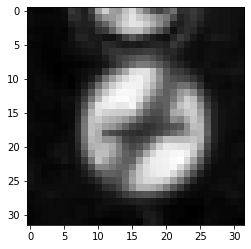

In [0]:
plt.imshow ( color.rgb2gray(X_train[0]), cmap = plt.get_cmap('gray') )

In [0]:
X_train_gray = color.rgb2gray( X_train )
X_test_gray = color.rgb2gray( X_test )

In [0]:
input_shape

(32, 32, 3)

In [0]:
X_train_gray.shape

(34799, 32, 32)

In [0]:
X_train_gray.reshape(-1, 32, 32, 1).shape

(34799, 32, 32, 1)

In [0]:
X_train_gray = color.rgb2gray( X_train ).reshape(-1, 32, 32, 1)
X_test_gray = color.rgb2gray( X_test ).reshape(-1, 32, 32, 1)

In [0]:
model = get_cnn_v5( (32, 32, 1), num_classes)
model_trained = train_model(model, X_train_gray, y_train, params_fit={})
predict(model_trained, X_test_gray, y_test)

Epoch 1/5
272/272 [==============================] - 218s 800ms/step - loss: 2.5008 - accuracy: 0.2964 - val_loss: 0.5870 - val_accuracy: 0.8196
Epoch 2/5
272/272 [==============================] - 218s 800ms/step - loss: 0.5454 - accuracy: 0.8239 - val_loss: 0.1217 - val_accuracy: 0.9644
Epoch 3/5
272/272 [==============================] - 217s 797ms/step - loss: 0.2469 - accuracy: 0.9205 - val_loss: 0.0585 - val_accuracy: 0.9831
Epoch 4/5
272/272 [==============================] - 216s 795ms/step - loss: 0.1692 - accuracy: 0.9467 - val_loss: 0.0373 - val_accuracy: 0.9894
Epoch 5/5
272/272 [==============================] - 215s 789ms/step - loss: 0.1393 - accuracy: 0.9544 - val_loss: 0.0272 - val_accuracy: 0.9926


0.9614512471655329

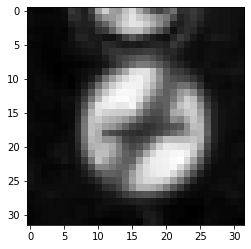

In [0]:
plt.imshow ( color.rgb2gray(X_train[0]), cmap = plt.get_cmap('gray') )

In [0]:
def preproc_img(img):
  hsv = color.rgb2hsv(img)
  hsv[:, :, 2] = exposure.equalize_adapthist(hsv[:, :, 2])
  img = color.hsv2rgb(hsv)

  return img

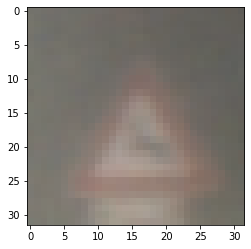

In [0]:
plt.imshow( X_train[400] )

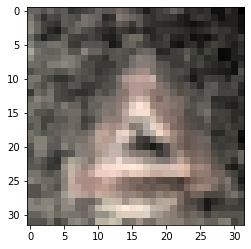

In [0]:
plt.imshow( preproc_img(X_train[400]) )

In [0]:
X_train_prp = X_train.copy().astype(np.float32)
X_test_prp = X_test.copy().astype(np.float32)

for i in tqdm(range(X_train.shape[0])):
  X_train_prp[i] = preproc_img(X_train[i])
for i in tqdm(range(X_test.shape[0])):
  X_test_prp[i] = preproc_img(X_test[i])

100%|██████████| 4410/4410 [00:54<00:00, 80.32it/s]
